In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# libraries to import the .mat files
import scipy.io as sio
import h5py

In [3]:
# importing os to get the current directory
import os

# Loading the data 

- We use the naming format of the data files to extract the information from them and store them in the dataframe ```data``` variable.
- The ```data``` variable stores a dictionary where each key corresponds to a file (We might consolidate all the entries into one dataframe later on). Each entry in the dictionary stores a list of datapoints. 
- Each datapoint is a dictionary with the following keys: 
    - <i>PID</i>: Patient ID
    - <i>image</i>: Image data
    - <i>label</i>: Label of the image
    - <i>tumorBorder</i>: Tumor border data
    - <i>tumorMask</i>: Tumor mask data

In [4]:
# Define the directory where the data is located
data_dir = 'data'

# Get a list of all subdirectories in the data directory that start with 'brainTumorDataPublic_'
data_dirs = [f for f in os.listdir(data_dir) if f.startswith('brainTumorDataPublic_') and os.path.isdir(os.path.join(data_dir, f))]

# Initialize an empty list to store the data
data = {}
counter = 0
dir_counter = 0

# Loop over each subdirectory
for d in data_dirs:

    data[dir_counter] = []

    # Get a list of all .mat files in the subdirectory
    files = [f for f in os.listdir(os.path.join(data_dir, d)) if f.endswith('.mat')]
    
    # Load each .mat file and append it to the data list
    for f in files:
        with h5py.File(os.path.join(data_dir, d, f), 'r') as file:
            # Access the 'cjdata' group
            cjdata = file['cjdata']

            # Initialize an empty dictionary to store the data from this file
            file_data = {}
            
            # Convert the data to a numpy array and append it to the data list
            for name in cjdata:
                # Add the member to the dictionary
                file_data[name] = np.array(cjdata[name])
                if name == 'label':
                    file_data[name] = file_data[name][0][0]
            # Append the dictionary to the data list
            data[dir_counter].append(file_data)

            # Increment the counter
            counter += 1
            # print the PID and label
            # print(f'Counter: {counter}')
    dir_counter += 1
            

# Exploratory data analysis

In [5]:
# print the number of keys in data
print(f'Number of keys in data: {len(data)}')

# Print the labels of the first sample
print(f'Labels: {data[0][0].keys()}')

# Print the number of samples
print(f'Number of samples: {len(data)}')

Number of keys in data: 4
Labels: dict_keys(['PID', 'image', 'label', 'tumorBorder', 'tumorMask'])
Number of samples: 4


In [6]:
# for the first 3 samples, print the keys and the shape of the data
for i in range(3):
    print(f'Sample {i}:')
    for key in data[1][i]:
        print(f'  {key}: {data[0][i][key].shape}')

Sample 0:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 24)
  tumorMask: (512, 512)
Sample 1:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 26)
  tumorMask: (512, 512)
Sample 2:
  PID: (6, 1)
  image: (512, 512)
  label: ()
  tumorBorder: (1, 30)
  tumorMask: (512, 512)


In [7]:
# Function to display all the attributes of a datapoint

def display_data(datum):
    print(f'Label = {datum["label"]}')
    print(f"Image shape: {datum['image'].shape}, dtype: {datum['image'].dtype}")
    print(f"Tumor Mask shape: {datum['tumorMask'].shape}, dtype: {datum['tumorMask'].dtype}")
    print(f"Tumor Border shape: {datum['tumorBorder'].shape}, dtype: {datum['tumorBorder'].dtype}")
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    ax[0].imshow(datum['image'], cmap='gray')
    ax[0].set_title('Image')
    ax[1].imshow(datum['tumorMask'], cmap='gray')
    ax[1].set_title('Tumor Mask')
    ax[2].imshow(datum['image'], cmap='gray')
    tumor_border_coords = datum['tumorBorder'].reshape(-1, 2)  # Assuming it's a list of (x, y) coordinates
    #draw tumor border onto image using coordinates from tumor border
    for i in range(tumor_border_coords.shape[0] - 1):
        y1, x1 = tumor_border_coords[i]
        y2, x2 = tumor_border_coords[i + 1]
        ax[2].plot([x1, x2], [y1, y2], 'r')  # Drawing red lines between consecutive points
    ax[2].set_title('Tumor Border')
    just_tumor = np.zeros_like(datum['tumorMask'])
    just_tumor = datum['image'] * datum['tumorMask']
    # just_tumor[datum['tumorMask'] == 1] = datum['image'][datum['tumorMask'] == 1]
    ax[3].imshow(just_tumor, cmap='gray')
    ax[3].set_title('Just Tumor')
    plt.show()

### Printing a few datapoints for each tumor type

Here, we use the label attribute to get the tumor type of each image. We then print a few images for each tumor type to get a sense of the data. <br>
We have also created a function that visualizes the images in the data. 

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 24), dtype: float64


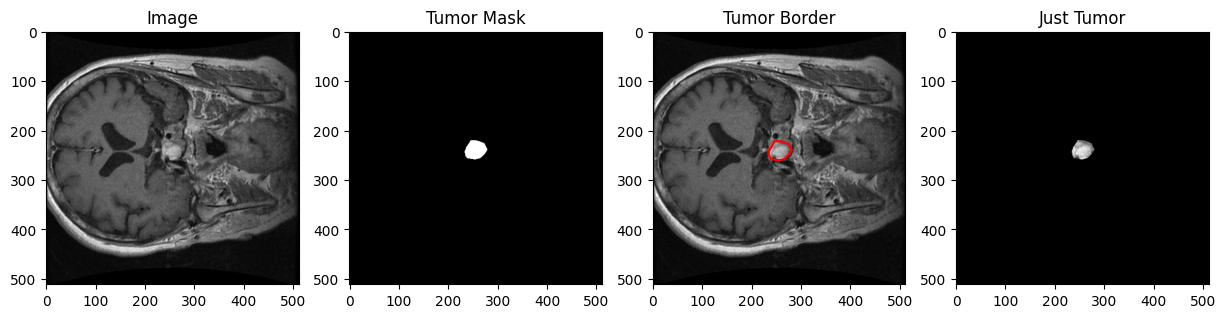

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 26), dtype: float64


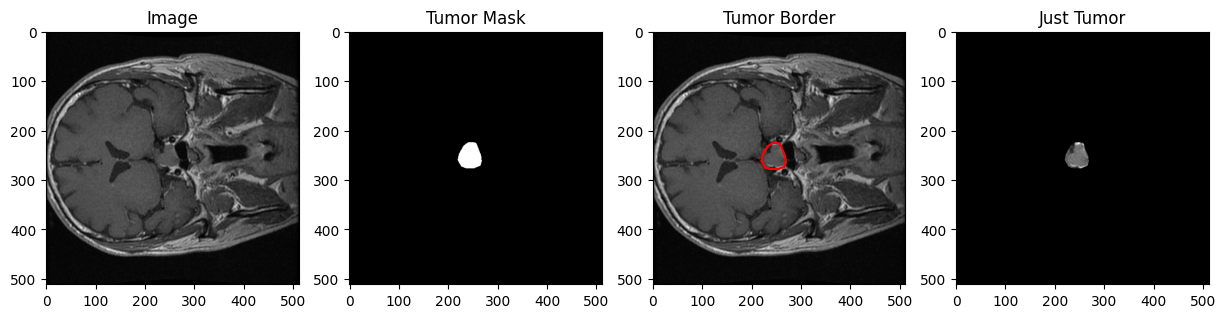

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


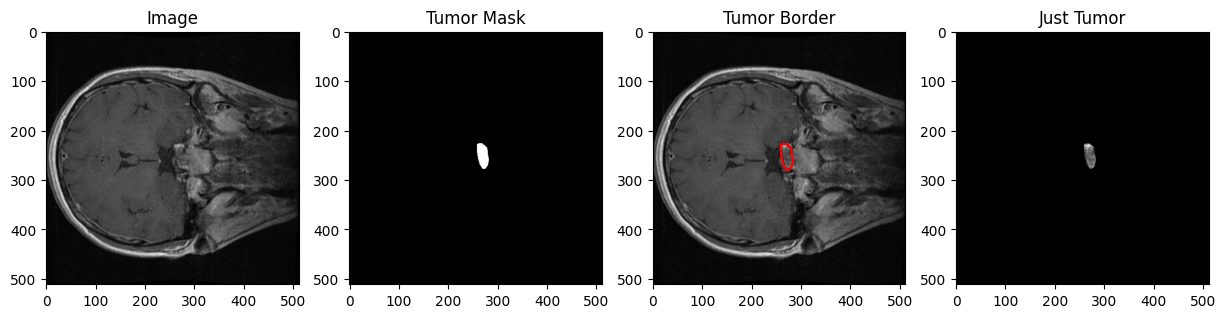

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 38), dtype: float64


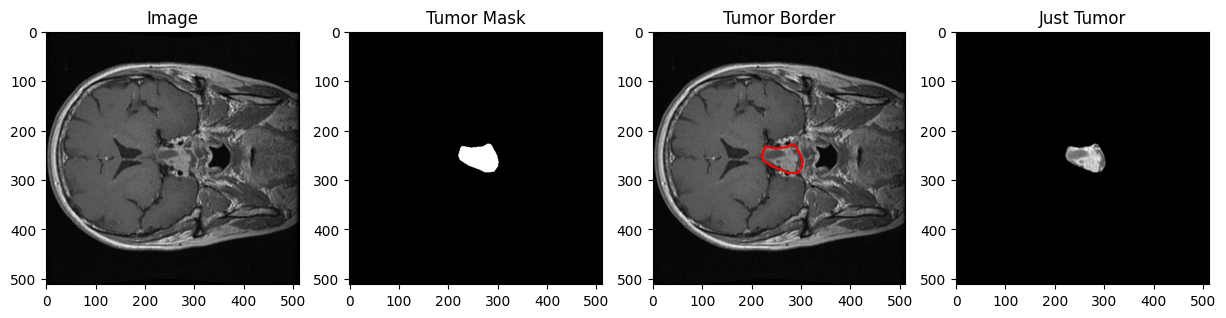

Label = 3.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 42), dtype: float64


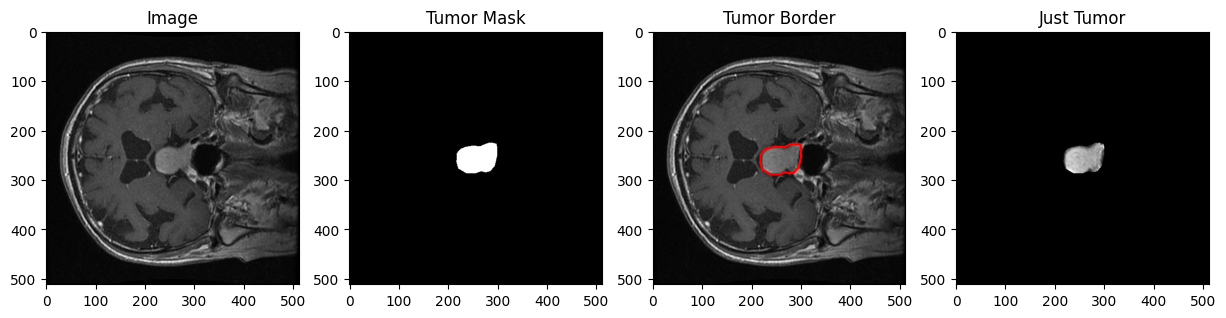

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 38), dtype: float64


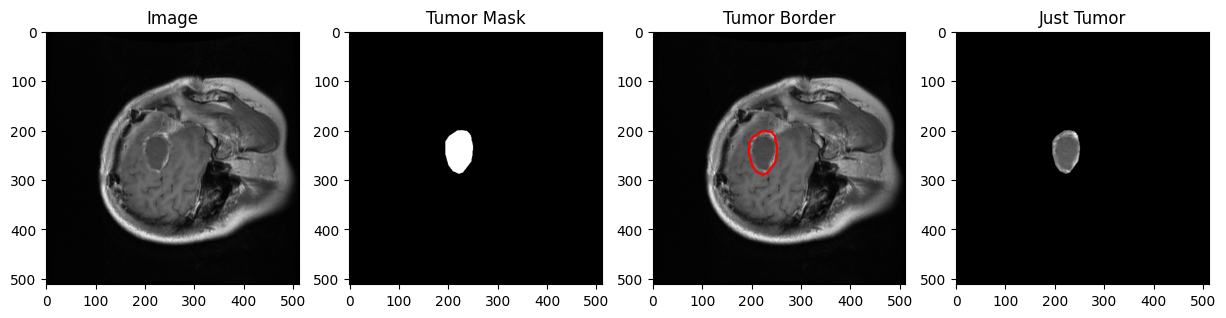

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 48), dtype: float64


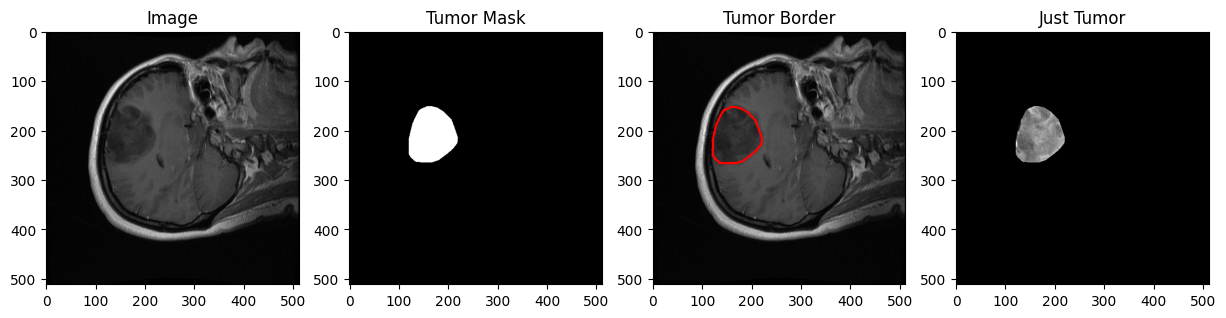

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 50), dtype: float64


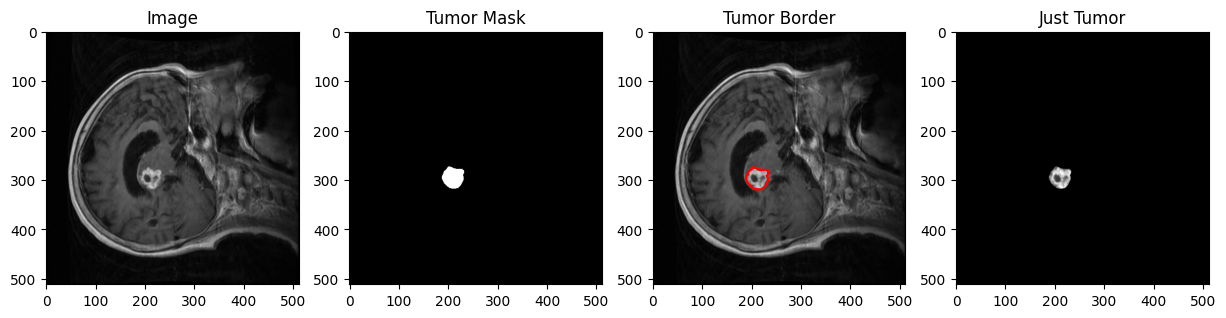

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 30), dtype: float64


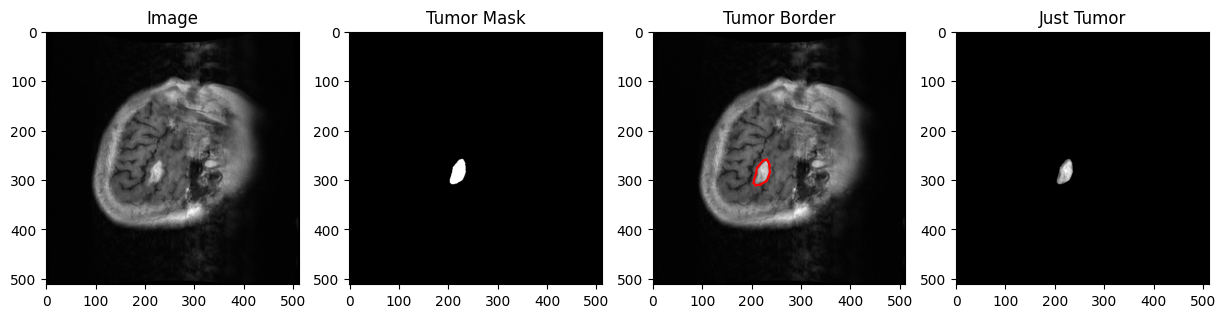

Label = 2.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


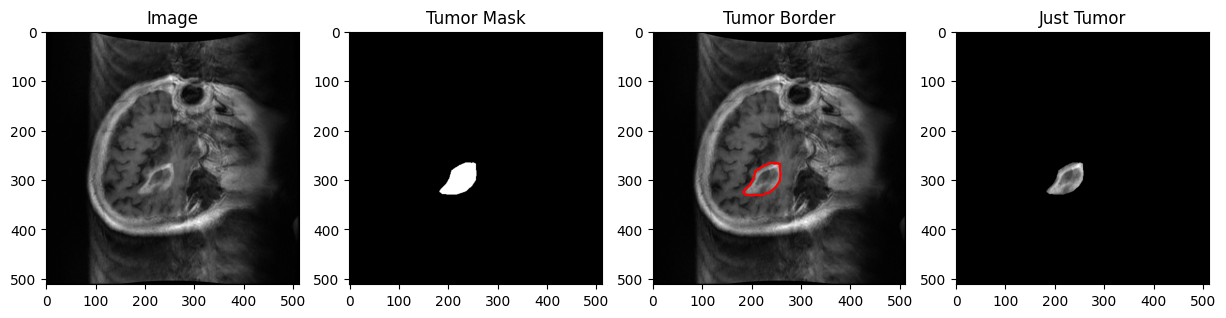

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


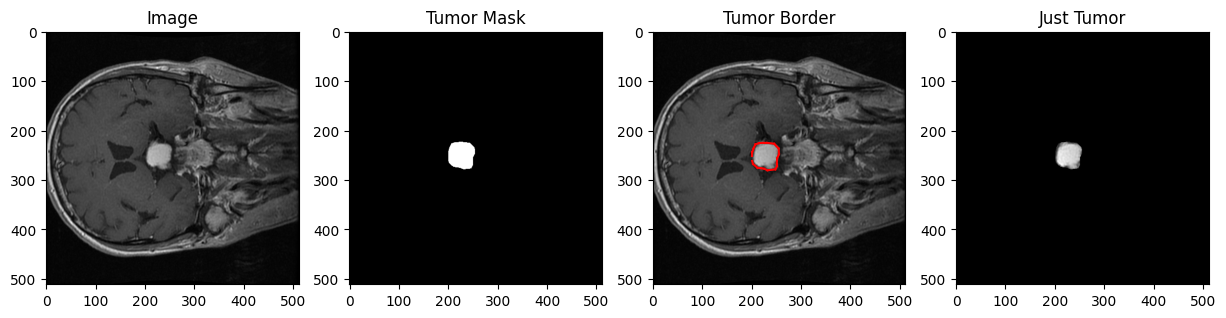

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 50), dtype: float64


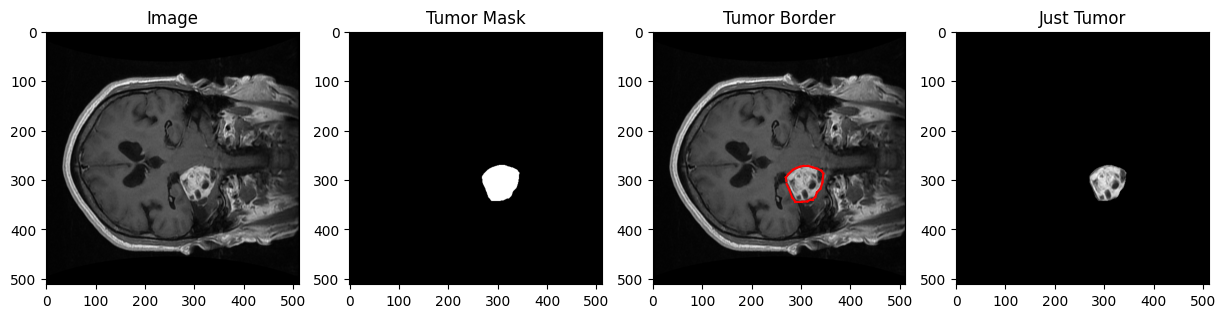

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 46), dtype: float64


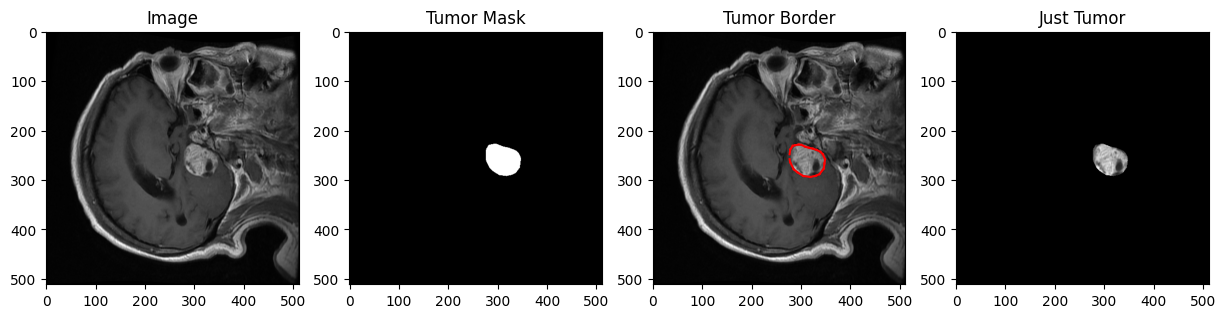

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 42), dtype: float64


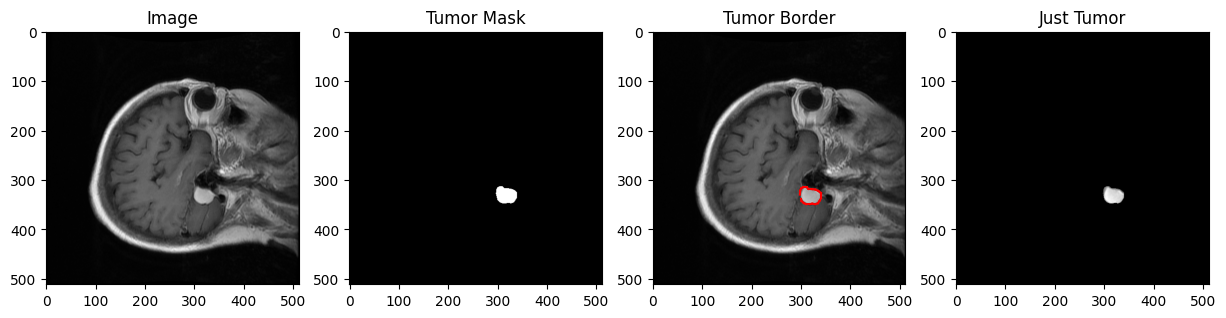

Label = 1.0
Image shape: (512, 512), dtype: int16
Tumor Mask shape: (512, 512), dtype: uint8
Tumor Border shape: (1, 40), dtype: float64


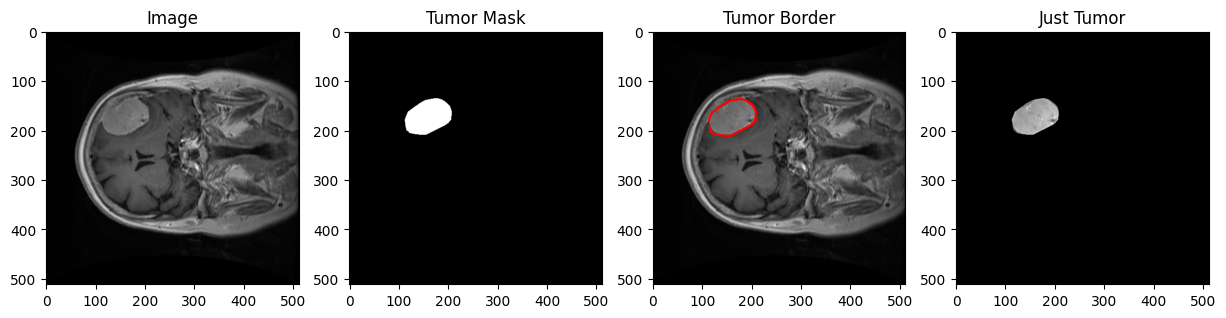

In [8]:
# Initialize a dictionary to keep track of how many elements of each label type have been printed
count = {0: 0, 1: 0, 2: 0, 3: 0}

# Loop over each key in the data dictionary
for j in range(4):
    # Loop over each dictionary in the list
    for i in range(len(data[j])):
        # Check if the label of the current dictionary is one of the keys in the count dictionary
        if data[j][i]['label'] in count:
            # Check if less than 5 elements of this label type have been printed
            if count[data[j][i]['label']] < 5:
                # Print the data
                display_data(data[j][i])
                
                # Increment the count for this label type
                count[data[j][i]['label']] += 1

In [9]:
# Consolidate the data into a single list
data_list = []
for j in range(4):
    print(f'Number of samples in data[{j}]: {len(data[j])}')
    data_list += data[j]

print(f'Number of samples: {len(data_list)}')


Number of samples in data[0]: 766
Number of samples in data[1]: 766
Number of samples in data[2]: 766
Number of samples in data[3]: 766
Number of samples: 3064


In [10]:
# print the max values of each image, tumorMask, and tumorBorder
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 12728
Max tumor mask value: 1
Max tumor border value: 470.0766550522648


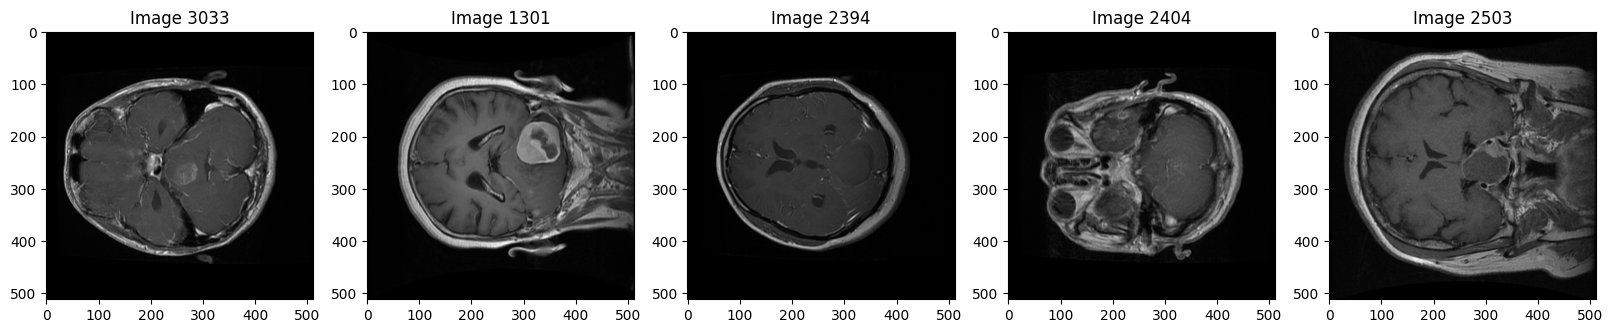

In [11]:
# Normalize the images and bounding box coordinates
for i in range(len(data_list)):
    data_list[i]['image'] = data_list[i]['image'] / max_image  # Normalize the image
    data_list[i]['tumorBorder'] = data_list[i]['tumorBorder'] / 512  # Assuming the image size is 512x512, which we have confirmed it to be

# Display the 5 random images
fig, ax = plt.subplots(1, 5, figsize=(20, 5))
for i in range(5):
    idx = np.random.randint(len(data_list))
    ax[i].imshow(data_list[idx]['image'], cmap='gray')
    ax[i].set_title(f'Image {idx}')
plt.show()



In [12]:
# print the max values of each image, tumorMask, and tumorBorder to confirm that they have been normalized
max_image = 0
max_tumorMask = 0
max_tumorBorder = 0
for i in range(len(data_list)):
    max_image = max(max_image, data_list[i]['image'].max())
    max_tumorMask = max(max_tumorMask, data_list[i]['tumorMask'].max())
    max_tumorBorder = max(max_tumorBorder, data_list[i]['tumorBorder'].max())

print(f'Max image value: {max_image}')
print(f'Max tumor mask value: {max_tumorMask}')
print(f'Max tumor border value: {max_tumorBorder}')

Max image value: 1.0
Max tumor mask value: 1
Max tumor border value: 0.9181184668989547


In [13]:
# print the raw array of an image, tumorMask, and tumorBorder

print(f'Image: {data_list[0]["image"]}')
print(f'Tumor Mask: {data_list[0]["tumorMask"]}')
print(f'Tumor Border: {data_list[0]["tumorBorder"]}')


Image: [[0.         0.         0.00031427 ... 0.         0.         0.        ]
 [0.         0.         0.00031427 ... 0.         0.         0.        ]
 [0.         0.         0.0007071  ... 0.         0.         0.        ]
 ...
 [0.         0.00031427 0.00125707 ... 0.         0.         0.        ]
 [0.         0.0002357  0.0009428  ... 0.         0.         0.        ]
 [0.         0.0002357  0.00102137 ... 0.         0.         0.        ]]
Tumor Mask: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Tumor Border: [[0.46515679 0.46167247 0.43205575 0.4825784  0.43379791 0.5087108
  0.44425087 0.53658537 0.46864111 0.54878049 0.48432056 0.54006969
  0.50348432 0.52090592 0.5087108  0.49825784 0.50348432 0.46689895
  0.4912892  0.45993031 0.47560976 0.45818815 0.46167247 0.46515679]]


In [14]:
# Split the data into training, validation, and test sets

# Set the random seed
np.random.seed(0)

# Shuffle the data
np.random.shuffle(data_list)

# Split the data into training, validation, and test sets
n = len(data_list)
train_data = data_list[:int(0.7*n)]
val_data = data_list[int(0.7*n):int(0.85*n)]
test_data = data_list[int(0.85*n):]

print(f'Number of training samples: {len(train_data)}')
print(f'Number of validation samples: {len(val_data)}')
print(f'Number of test samples: {len(test_data)}')



Number of training samples: 2144
Number of validation samples: 460
Number of test samples: 460


### Adding Data Augmentation

In [15]:
import cv2
import random

In [16]:
def augment_data(image):
    # Original image
    original_image = image

    # Horizontally flipped image
    flipped_image = cv2.flip(original_image, 1)  # 1 means flipping around y-axis

    # Mirrored image
    mirrored_image = original_image[:, ::-1]

    # Rotated image
    rotated_image = cv2.rotate(original_image, cv2.ROTATE_90_CLOCKWISE)

    return [original_image, flipped_image, mirrored_image, rotated_image]

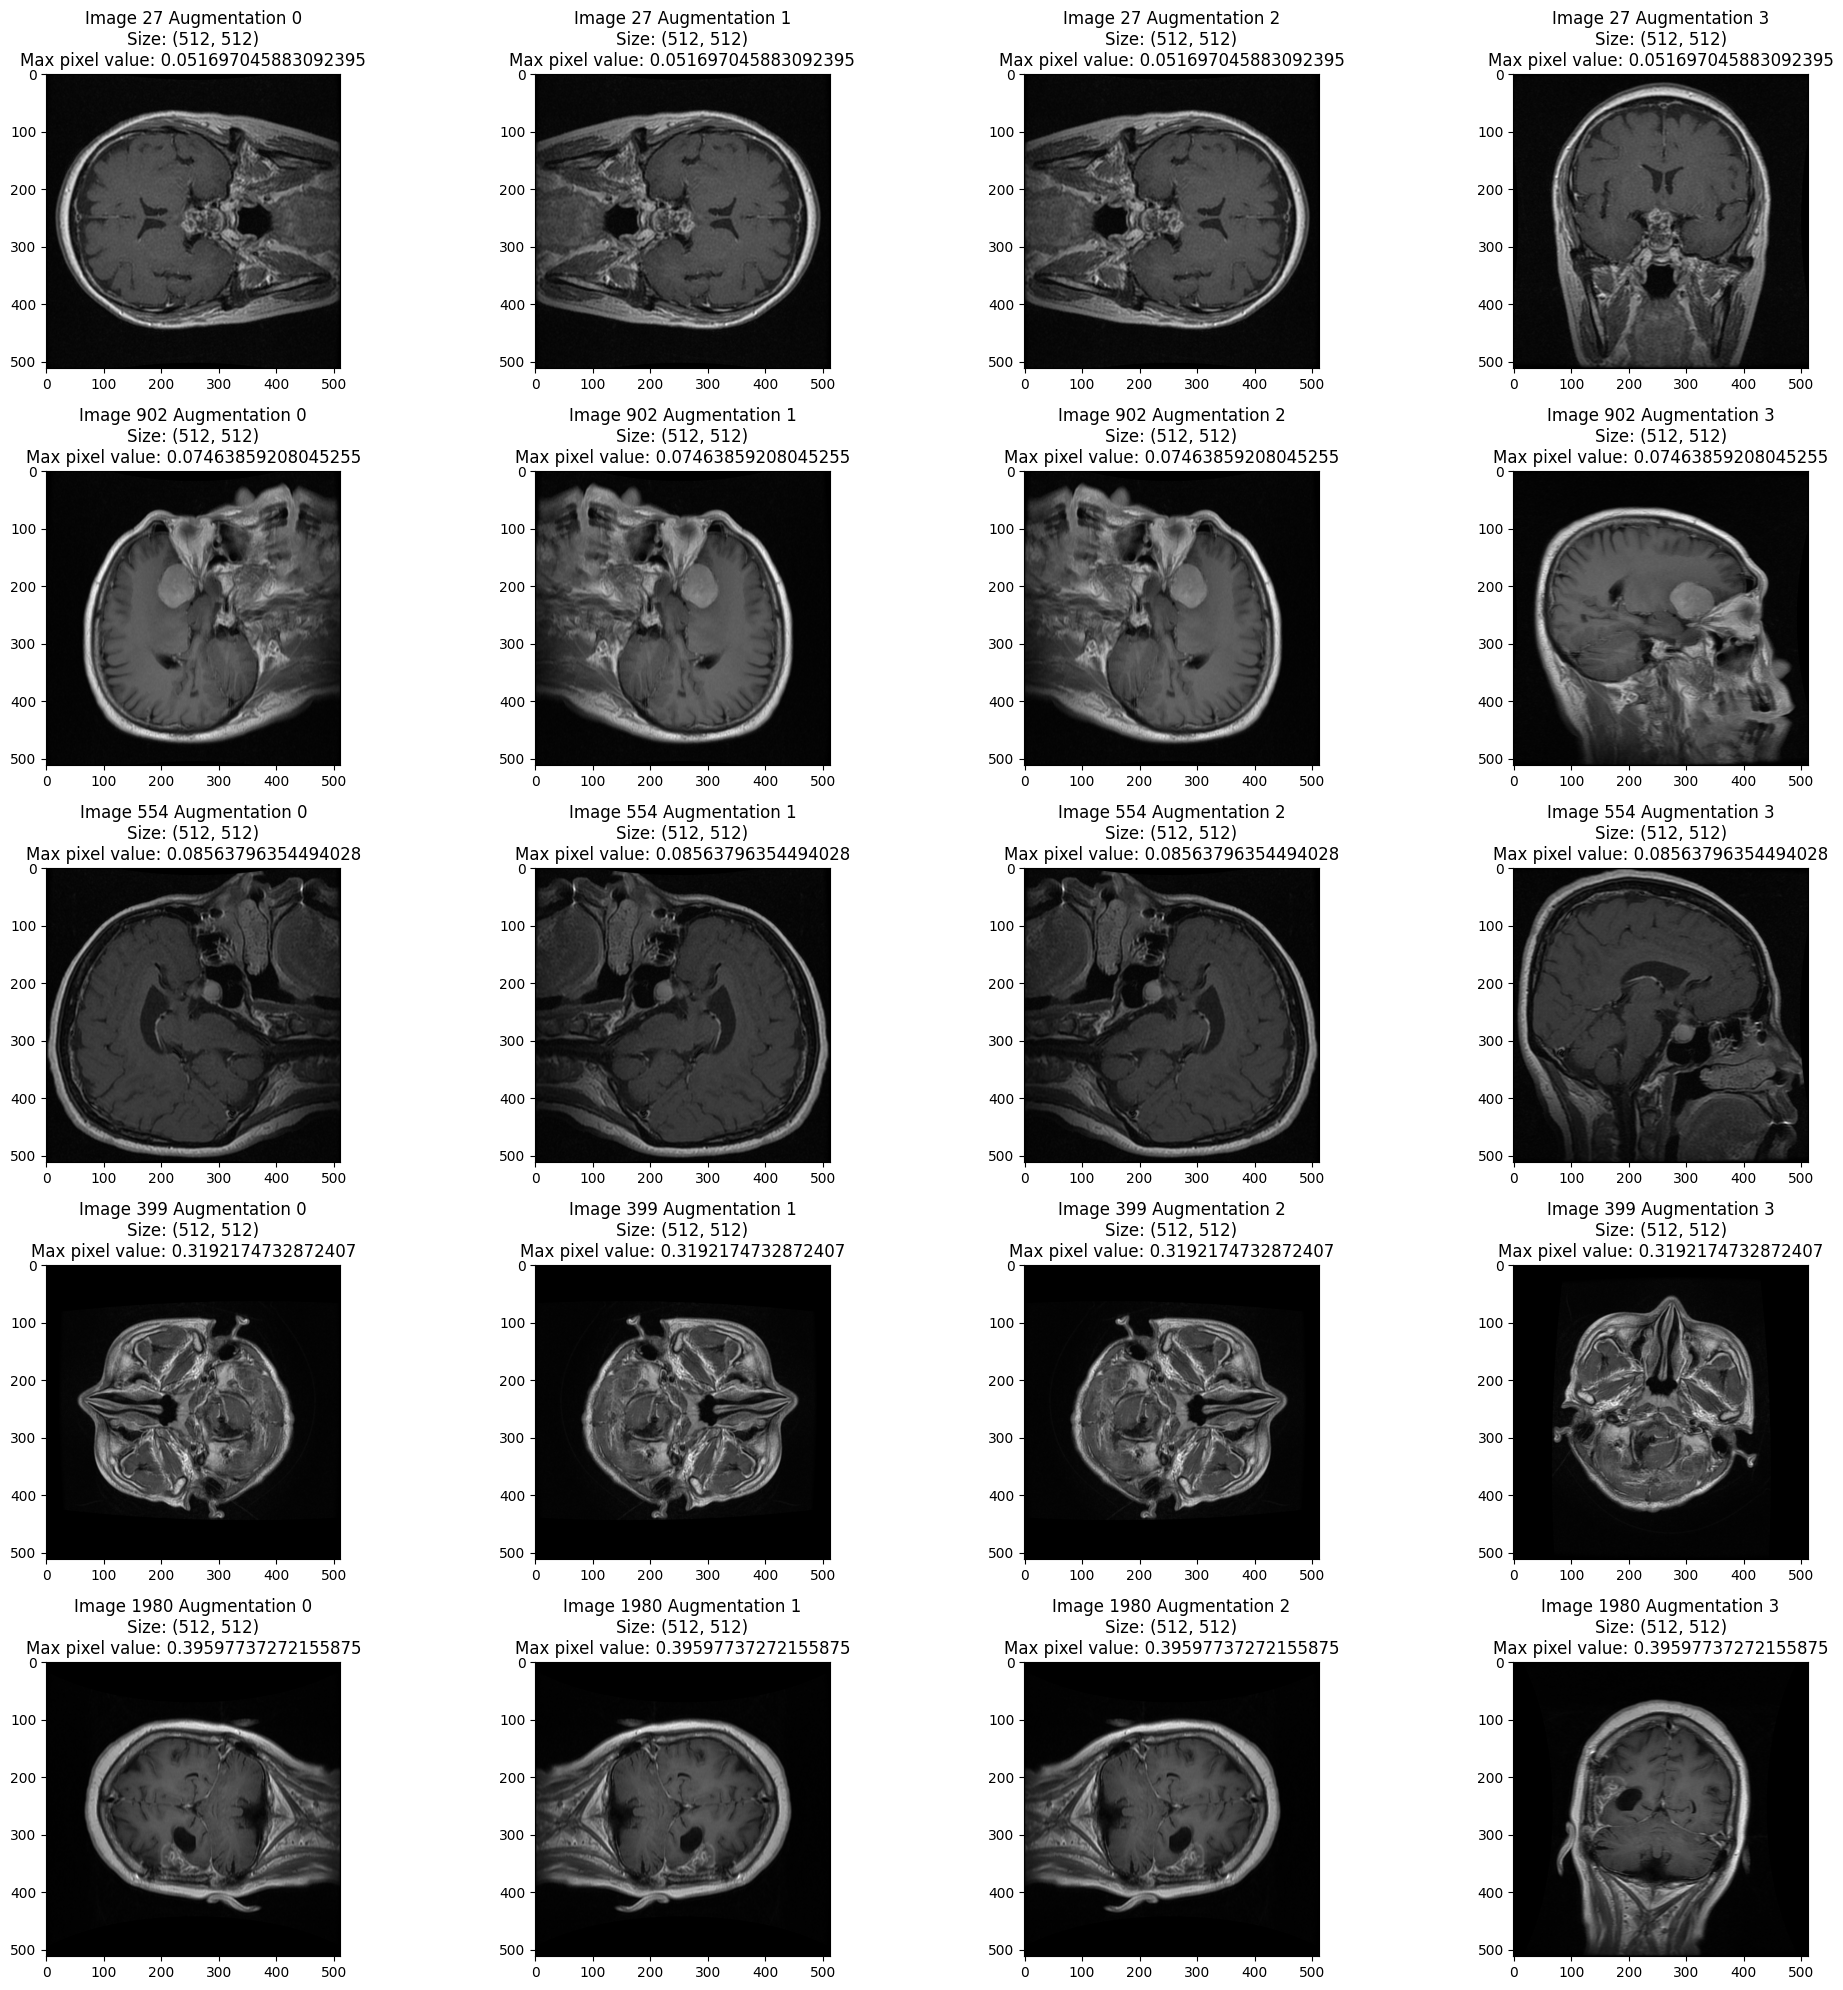

In [17]:
# print 5 random images, their sizes, max pixel values and their augmentations

fig, ax = plt.subplots(5, 4, figsize=(20, 20))
for i in range(5):
    idx = np.random.randint(len(train_data))
    image = train_data[idx]['image']
    augmentations = augment_data(image)
    for j in range(4):
        ax[i, j].imshow(augmentations[j], cmap='gray')
        title = (f'Image {idx} Augmentation {j}\n'
                 f'Size: {augmentations[j].shape}\n'
                 f'Max pixel value: {augmentations[j].max()}')
        ax[i, j].set_title(title)
plt.tight_layout()
plt.show()

In [18]:
from keras.utils import Sequence
import random

> **Note:** Since the labels are $[1.0, 2.0, 3.0]$, we have converted them to $[0, 1, 2]$ in order to comply with the requirements of the loss function.

In [20]:
import numpy as np
import random
from keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, batch_size, augmentations=None):
        self.data = data
        self.batch_size = batch_size // 4  # Adjust the batch size
        self.augmentations = augmentations if augmentations else []

    def __len__(self):
        # Ensure the total length accounts for the augmentations
        return int(np.ceil(len(self.data) / self.batch_size) * 4)

    def __getitem__(self, idx):
        # Calculate the start and end indices of the batch
        actual_idx = idx % int(np.ceil(len(self.data) / self.batch_size))
        start_idx = actual_idx * self.batch_size
        end_idx = min(start_idx + self.batch_size, len(self.data))

        batch = self.data[start_idx:end_idx]

        if len(batch) == 0:  # Skip empty batches
            raise IndexError("Empty batch encountered")

        batch_images = []
        batch_labels = []

        for item in batch:
            image = item['image']
            label = item['label'] - 1  # Subtract 1 from the label

            # Apply a random augmentation function
            if self.augmentations:
                augment_func = random.choice(self.augmentations)
                images = augment_func(image)
            else:
                images = [image]

            for img in images:
                if img.shape == (512, 512):  # Ensure the image shape is correct
                    batch_images.append(img)
                    batch_labels.append(label)
                else:
                    print(f"Skipping image with shape {img.shape}")

        # Convert lists to numpy arrays
        if batch_images and batch_labels:  # Check if batch lists are not empty
            batch_images = np.expand_dims(np.array(batch_images), axis=-1)  # Adding channel dimension
            batch_labels = np.array(batch_labels)
            if batch_images.shape == (len(batch_labels), 512, 512, 1):  # Ensure shapes match
                # Debugging: Print the shapes of the arrays
                print(f'Batch {idx} - Images shape: {batch_images.shape}, Labels shape: {batch_labels.shape}')
                return batch_images, batch_labels
            else:
                print(f"Skipping batch due to shape mismatch: {batch_images.shape}, {batch_labels.shape}")
                raise IndexError("Shape mismatch")

        raise IndexError("Invalid batch generated")

# Initialize the data generators with debugging
train_gen = DataGenerator(train_data, batch_size=16, augmentations=[augment_data])
val_gen = DataGenerator(val_data, batch_size=16, augmentations=[augment_data])

# Print information about the first batch to debug
try:
    images, labels = train_gen[0]
    print(f'First training batch - Images shape: {images.shape}, Labels shape: {labels.shape}')
except IndexError as e:
    print(f"Error generating first training batch: {e}")

# # Train the model
# history = model.fit(train_gen, 
#                     validation_data=val_gen, 
#                     epochs=10)


Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
First training batch - Images shape: (16, 512, 512, 1), Labels shape: (16,)


### Data format

The data is stored in a list where each entry is a dictionary with the following keys:
- <i>PID</i>: Patient ID
- <i>image</i>: Image data
- <i>label</i>: Label of the image
- <i>tumorBorder</i>: Tumor border data
- <i>tumorMask</i>: Tumor mask data



In [21]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D

In [22]:
# Define the input layer
inputs = Input(shape=(512, 512, 1))

# Add convolutional and pooling layers
x = Conv2D(32, (3, 3), activation='relu', strides=2)(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', strides=2)(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', strides=2)(x)

# Flatten the output
x = Flatten()(x)

# Add a dense layer
x = Dense(128, activation='relu')(x)

# Define the classification output
classification_output = Dense(3, activation='softmax', name='classification')(x)

# Define the model
model = Model(inputs=inputs, outputs=classification_output)

# Compile the model with a single loss function
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 255, 255, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 128)       73856 

In [23]:
# Initialize the data generators
train_gen = DataGenerator(train_data, batch_size=16, augmentations=[augment_data])
val_gen = DataGenerator(val_data, batch_size=16, augmentations=[augment_data])

print(f'Number of training batches: {len(train_gen)}')
print(f'Number of validation batches: {len(val_gen)}')

Number of training batches: 2144
Number of validation batches: 460


Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Length of image array: 16
Length of label array: 16
Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Length of validation image array: 16
Length of validation label array: 16
Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 2 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 3 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 4 - Images shape: (16, 512, 512, 1), Labels shape: (16,)


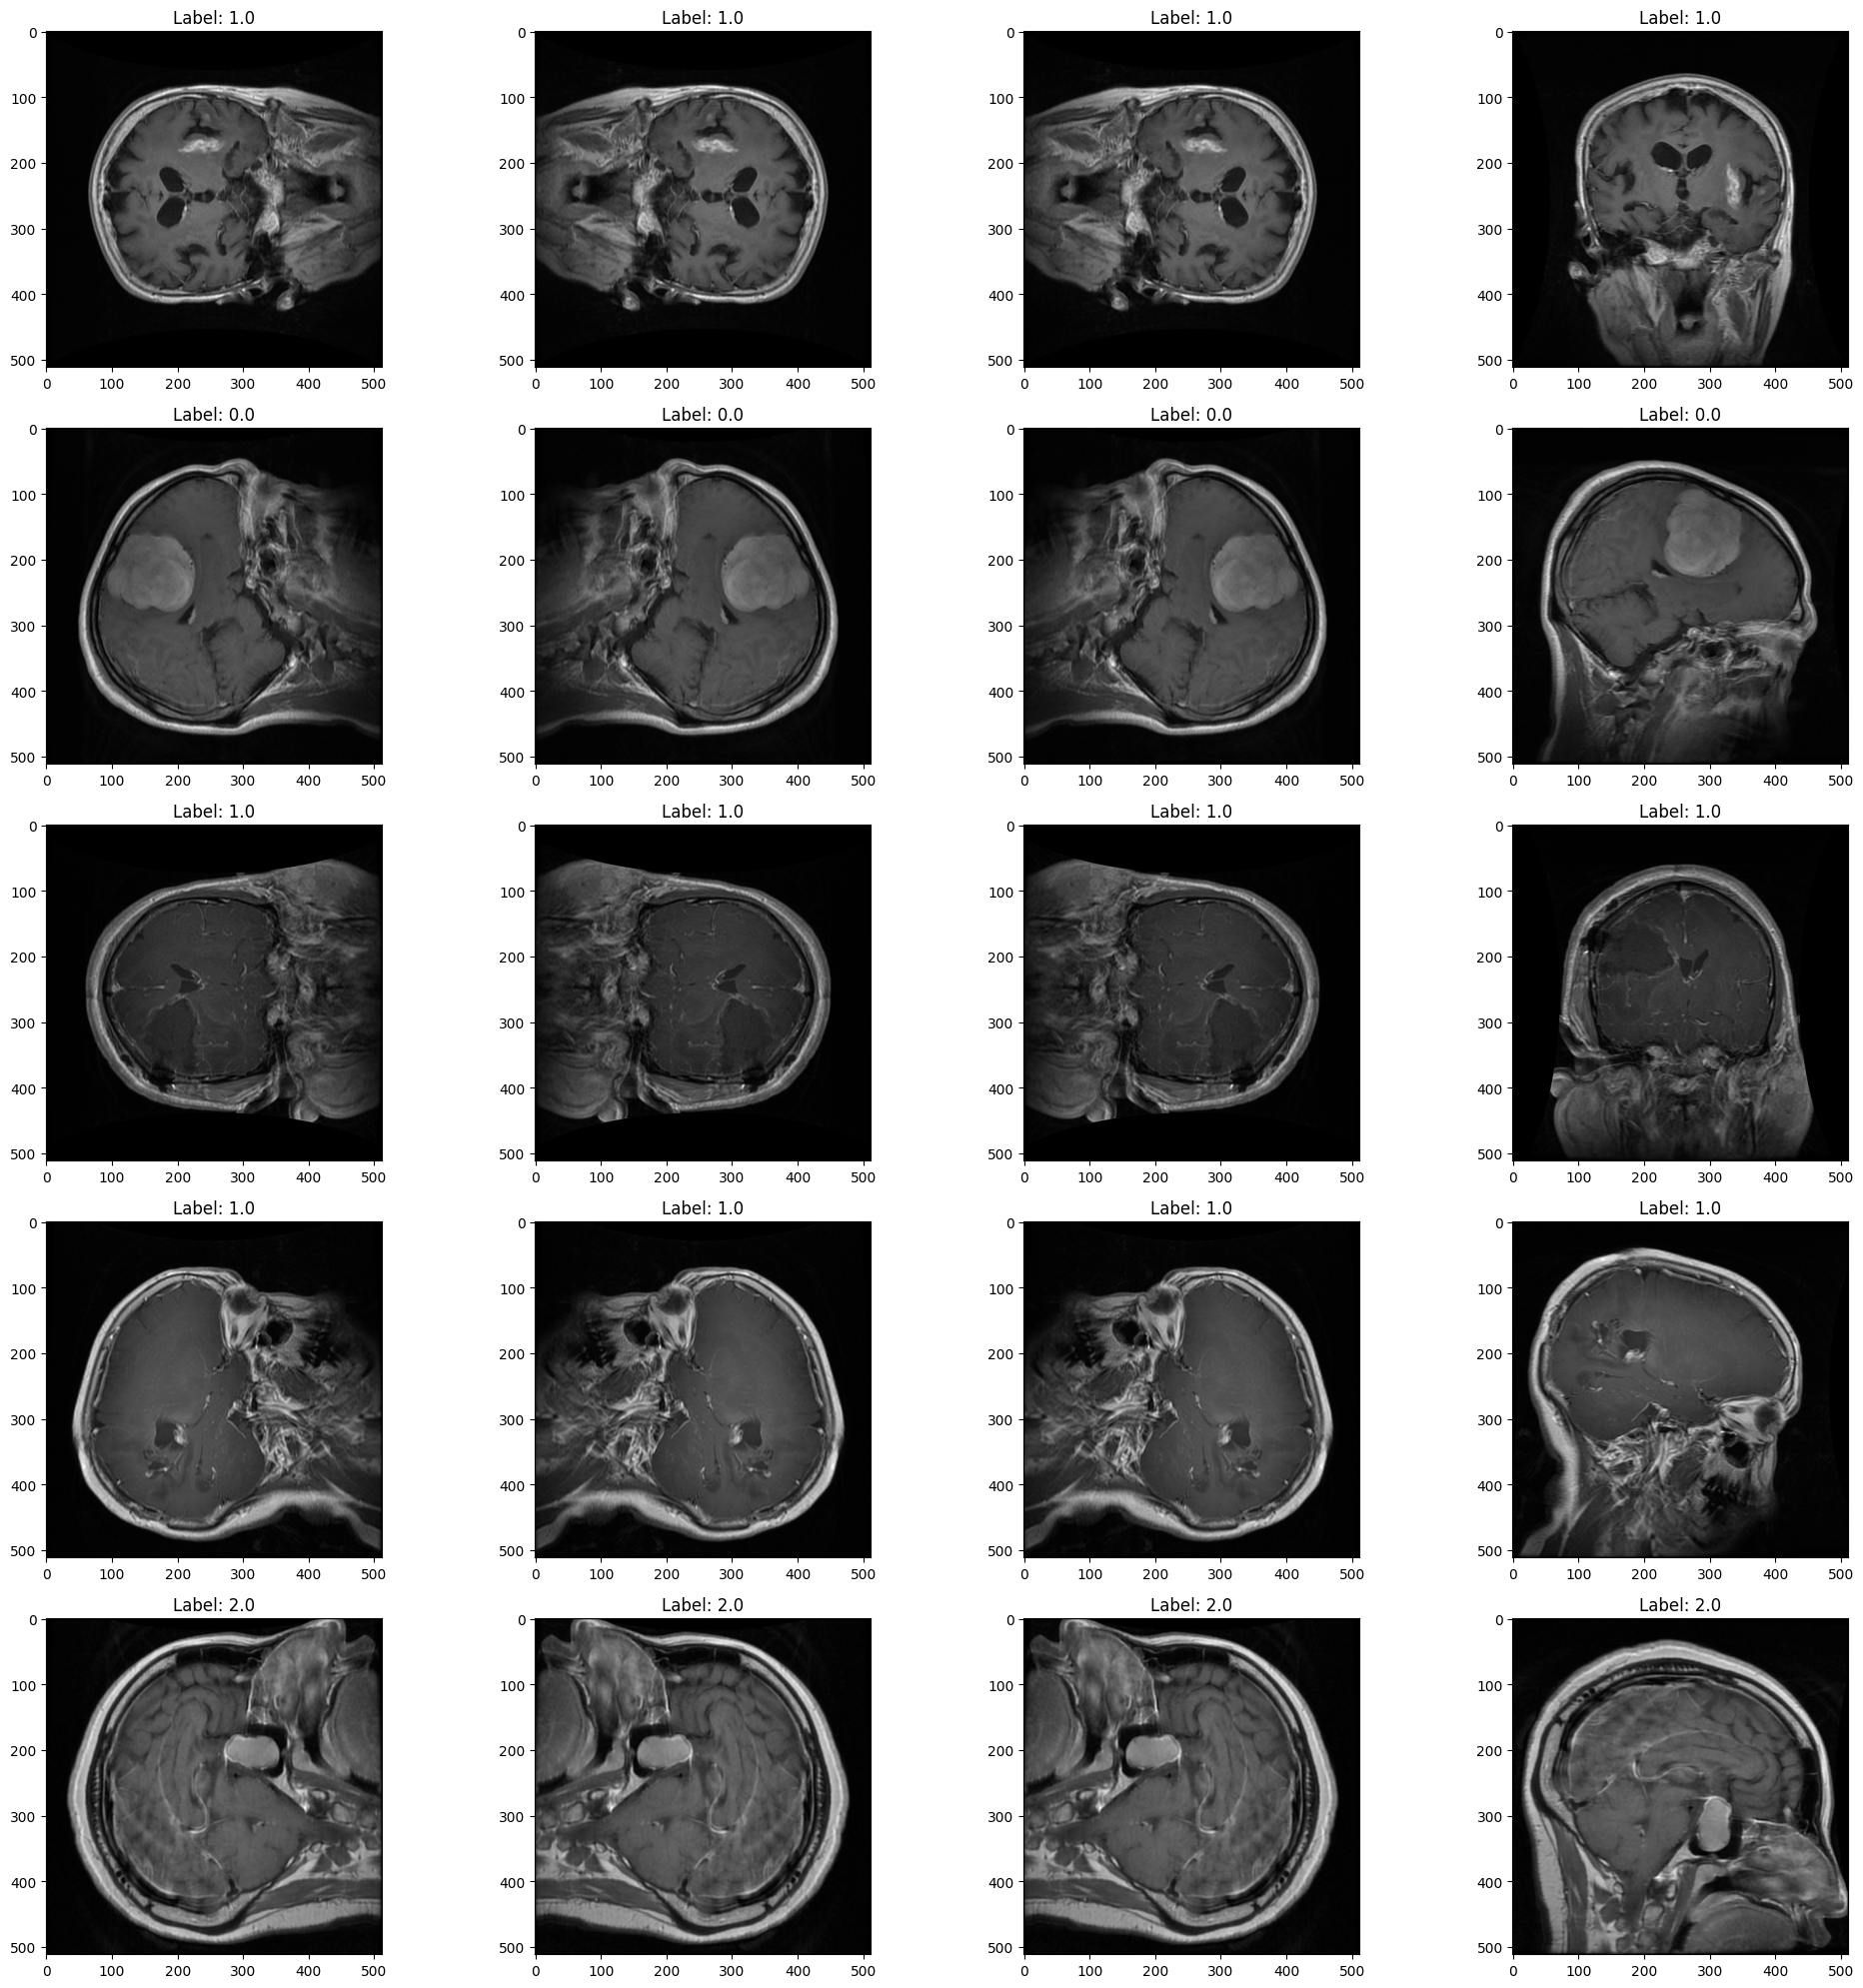

Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 2 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 3 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 4 - Images shape: (16, 512, 512, 1), Labels shape: (16,)


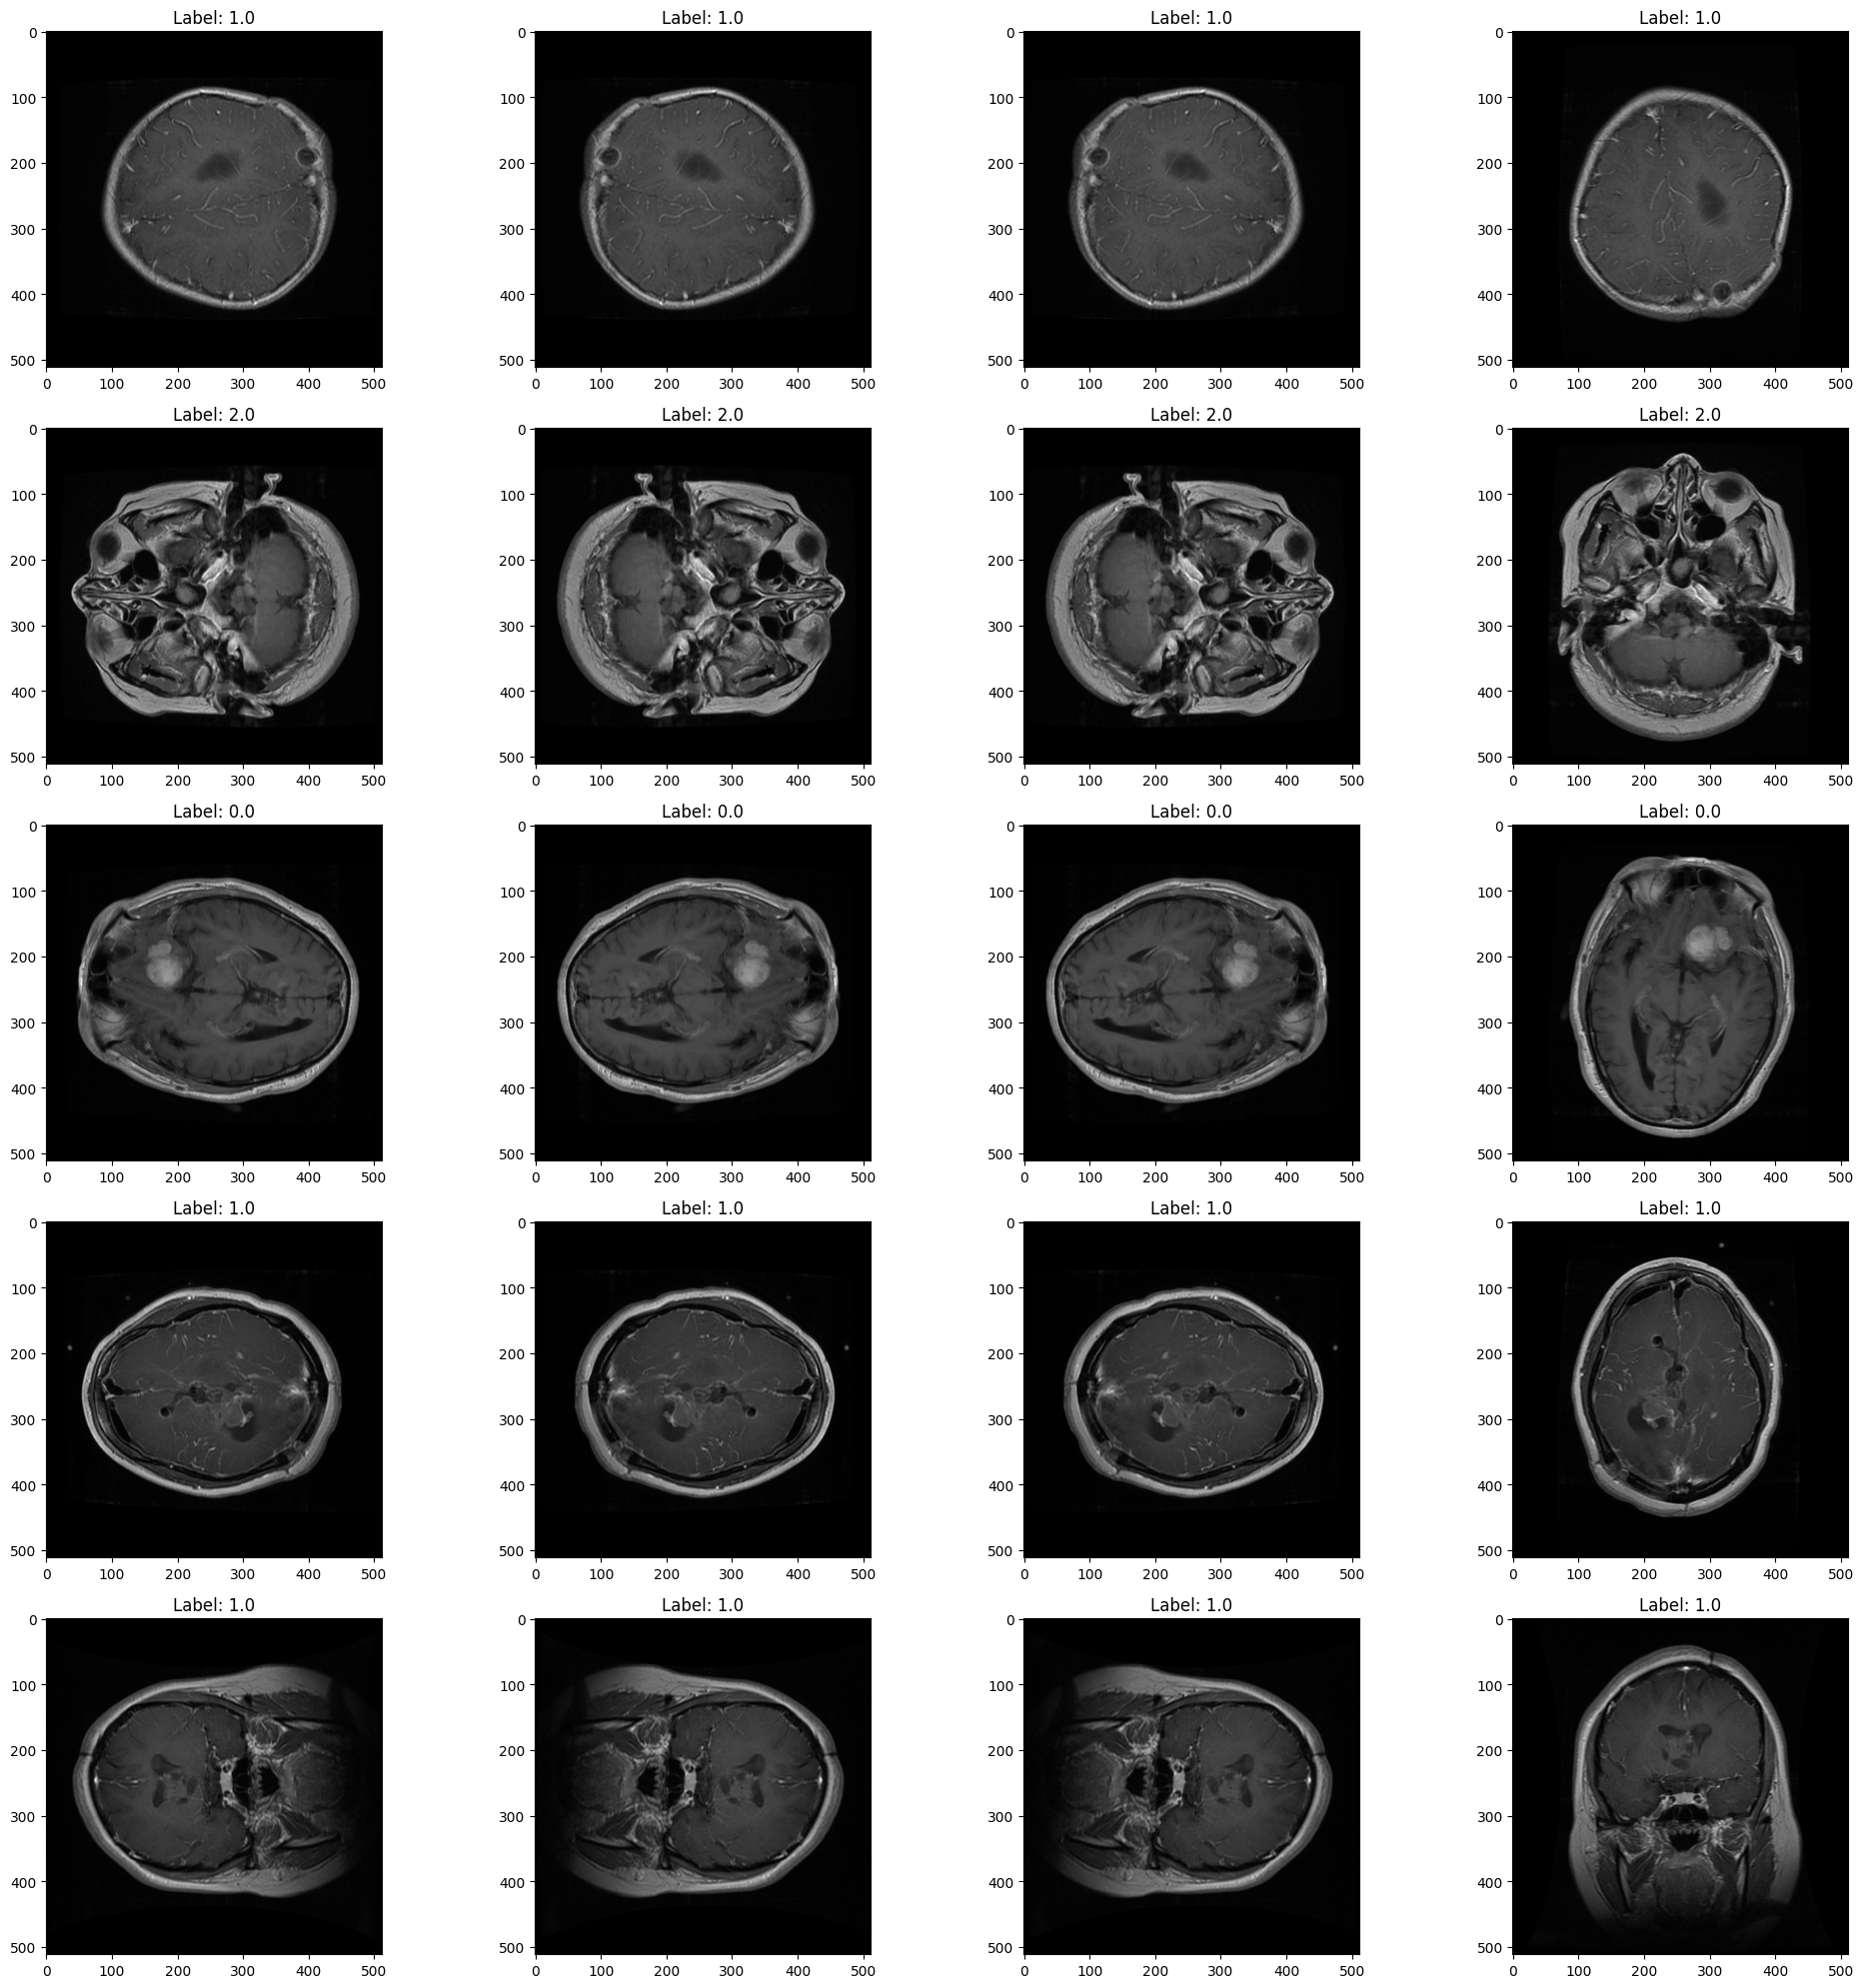

In [24]:
# Train the model

# print the information of the training and validation generators
# Generate a batch from the training generator
images, labels = next(iter(train_gen))

# Print the lengths
print(f'Length of image array: {len(images)}')
print(f'Length of label array: {len(labels)}')

# Generate a batch from the validation generator
images_val, labels_val = next(iter(val_gen))

# Print the lengths
print(f'Length of validation image array: {len(images_val)}')
print(f'Length of validation label array: {len(labels_val)}')

# print the image and label of 5 random samples from the training generator
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
for i in range(5):
    images, labels = train_gen[i]
    for j in range(4):
        ax[i, j].imshow(images[j].squeeze(), cmap='gray')
        ax[i, j].set_title(f'Label: {labels[j]}')
plt.tight_layout()
plt.show()

# Print the image and label of 5 random samples from the validation generator
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
for i in range(5):
    images_val, labels_val = val_gen[i]
    for j in range(4):
        ax[i, j].imshow(images_val[j].squeeze(), cmap='gray')
        ax[i, j].set_title(f'Label: {labels_val[j]}')
plt.tight_layout()
plt.show()

In [25]:
history = model.fit(train_gen, 
                    validation_data=val_gen, 
                    epochs=2)

Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Epoch 1/2
Batch 1608 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Batch 1386 - Images shape: (12, 512, 512, 1), Labels shape: (12,)
Batch 795 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
  19/2144 [..............................] - ETA: 9:18 - loss: 1.0001 - accuracy: 0.5167Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Batch 1245 - Images shape: (12, 512, 512, 1), Labels shape: (12,)
  83/2144 [>.............................] - ETA: 8:53 - loss: 0.9365 - accuracy: 0.5705Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Batch 271 - Images shape: (12, 512, 512, 1),

In [26]:
# validate the model

# Generate a batch from the validation generator
test_gen = DataGenerator(test_data, batch_size=16, augmentations=[augment_data])

# Evaluate the model
loss, accuracy = model.evaluate(test_gen)



Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
  1/460 [..............................] - ETA: 1:50 - loss: 0.0394 - accuracy: 1.0000Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
 12/460 [..............................] - ETA: 42s - loss: 0.5154 - accuracy: 0.8085Batch 12 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 13 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
 15/460 [..............................] - ETA: 45s - loss: 0.4165 - accuracy: 0.8475Batch 15 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Batch 16 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
 20/460 [>.............................] - ETA: 43s - loss: 0.3780 - accuracy: 0.8639Batch 21 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
Ba

In [28]:
# Initialize lists to store the predicted and actual labels
predicted_labels = []
actual_labels = []

# Iterate over the entire test generator
for images_test, labels_test in test_gen:
    # Get the model predictions
    predictions = model.predict(images_test)

    # Get the predicted labels and add them to the list
    predicted_labels.extend(np.argmax(predictions, axis=1))

    # Add the actual labels to the list
    actual_labels.extend(labels_test)

# Convert the lists to numpy arrays
predicted_labels = np.array(predicted_labels)
actual_labels = np.array(actual_labels)

# Get the correct and incorrect predictions
correct_indices = np.where(predicted_labels == actual_labels)[0]
incorrect_indices = np.where(predicted_labels != actual_labels)[0]

# Print the number of correct and incorrect predictions
print(f'Number of correct predictions: {len(correct_indices)}')
print(f'Number of incorrect predictions: {len(incorrect_indices)}')

Batch 0 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 177ms/step
Batch 1 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 98ms/step
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Skipping image with shape (256, 256)
Batch 2 - Images shape: (12, 512, 512, 1), Labels shape: (12,)
1/1 [==============================] - 0s 66ms/step
Batch 3 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 71ms/step
Batch 4 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 63ms/step
Batch 5 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 65ms/step
Batch 6 - Images shape: (16, 512, 512, 1), Labels shape: (16,)
1/1 [==============================] - 0s 71ms/step
Batch 7 - Images shape: (16, 512, 512, 1), Lab

In [29]:
# find the percentage of correct predictions
correct_percentage = len(correct_indices) / len(predicted_labels) * 100
print(f'Percentage of correct predictions: {correct_percentage:.2f}%')


Percentage of correct predictions: 88.95%


In [31]:
# save the model as base_classifier.h5

model.save('base_classifier')


INFO:tensorflow:Assets written to: base_classifier/assets


INFO:tensorflow:Assets written to: base_classifier/assets
